In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [21]:

# Step 1: Load dataset
data = pd.read_csv('/content/taxi_trip_pricing.csv')

In [22]:
data.isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [23]:
label_encoder = LabelEncoder()
data['Traffic_Conditions'] = label_encoder.fit_transform(data['Traffic_Conditions'])

Imputing Null values

In [26]:
data['Trip_Distance_km'].fillna(data['Trip_Distance_km'].median(),inplace=True)
data['Trip_Price'].fillna(data['Trip_Price'].median(),inplace=True)
data['Traffic_Conditions'].fillna(data['Traffic_Conditions'].mode()[0],inplace=True)
data['Trip_Duration_Minutes'].fillna(data['Trip_Duration_Minutes'].median(),inplace=True)

<ipython-input-26-f056ba88181f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Trip_Distance_km'].fillna(data['Trip_Distance_km'].median(),inplace=True)
<ipython-input-26-f056ba88181f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [12]:
data.isnull().sum()

,0
Trip_Distance_km,0
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,0
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,0


In [13]:
# Step 2: Select relevant features and target
X = data[['Trip_Distance_km']]
y = data['Trip_Price']

In [14]:

# Step 3: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:

# Step 4: Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:

# Step 5: Make predictions
y_pred = model.predict(X_test)

In [17]:
# Step 6: Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [18]:
print(f"R^2 Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R^2 Score: 0.47
Mean Squared Error: 442.44


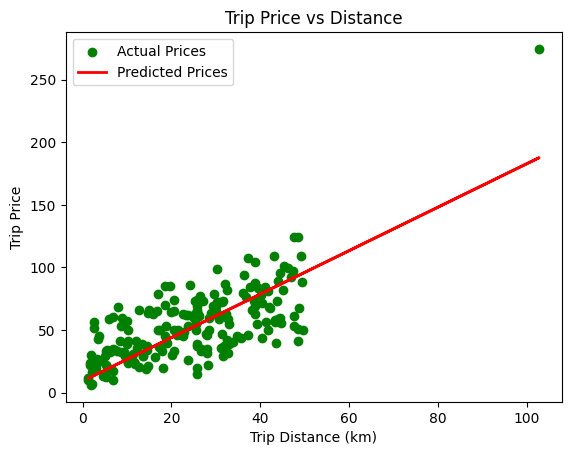

In [19]:
# Step 7: Visualize results
plt.scatter(X_test, y_test, color='Green', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Trip Price')
plt.title('Trip Price vs Distance')
plt.legend()
plt.show()